# Ejemplo de uso de la librería Music21

In [83]:
from music21 import * #Documentación: https://web.mit.edu/music21/doc/
import os
from collections import Counter
import pandas as pd

Cargamos la partitura

In [115]:
path_a_la_partitura = os.getcwd() + '\\Septima.xml'
digital_score = converter.parse(path_a_la_partitura)

Observamos qué instrumentos tiene la partitura

In [116]:
for part in digital_score.parts:
    print(part.partName)

Flute, Flutes
Oboe, Oboes
A Clarinet, Clarinets in A
Bassoon, Bassoons
Horn in F, Horns in A
Serpent, Trumpets in D
Timpani, Timpani in A E
Violins, 1st Violins
Violins, 2nd Violins
Violas, Violas
Violoncellos, Cellos/Basses
Contrabasses, Cellos/Basses


## Extracción de todas las notas de una voz

Creamos una función que nos extraiga todas las notas de una voz

In [117]:
def get_notes(part):
    notes_and_rests = list(part.flat.notesAndRests)
    return notes_and_rests

flute_part = digital_score.parts[0]
flute_notes = get_notes(flute_part)
flute_notes[:30]

[<music21.note.Rest rest>,
 <music21.chord.Chord C#6 A6>,
 <music21.note.Rest rest>,
 <music21.note.Rest rest>,
 <music21.note.Rest rest>,
 <music21.chord.Chord B5 E6>,
 <music21.note.Rest rest>,
 <music21.note.Rest rest>,
 <music21.note.Rest rest>,
 <music21.chord.Chord C#6 E6>,
 <music21.note.Rest rest>,
 <music21.note.Rest rest>,
 <music21.note.Note A>,
 <music21.note.Rest rest>,
 <music21.note.Note A>,
 <music21.note.Note B>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note A>,
 <music21.note.Note E>,
 <music21.note.Rest rest>,
 <music21.note.Rest rest>,
 <music21.note.Rest rest>,
 <music21.note.Rest rest>,
 <music21.note.Rest rest>,
 <music21.note.Note G#>,
 <music21.note.Note G#>,
 <music21.note.Note A>,
 <music21.note.Note B>,
 <music21.note.Note C#>]

Sacamos información de los datos. En este caso, solo nos quedaremos con el nombre y la octava. Sin embargo, también podríamos obtener la duración de la nota con note.quarterLength

In [118]:
def get_notesValidInformation(list_notes):
    final_list = []
    for n in list_notes:
        if n.isNote:
            note_information = n.nameWithOctave
        elif n.isRest:
            note_information = 'Rest'
        else: #chord
            notas_en_acorde = n.pitches #lista de objetos de notas
            info_notas_chord = []
            for nota_acorde in notas_en_acorde:
                info_notas_chord.append(nota_acorde.nameWithOctave)
            note_information = tuple(info_notas_chord)
        final_list.append(note_information)
    return final_list

In [119]:
flute_notes_info = get_notesValidInformation(flute_notes)
print(flute_notes_info[:20])

['Rest', ('C#6', 'A6'), 'Rest', 'Rest', 'Rest', ('B5', 'E6'), 'Rest', 'Rest', 'Rest', ('C#6', 'E6'), 'Rest', 'Rest', 'A5', 'Rest', 'A5', 'B5', 'C6', 'C6', 'A5', 'E6']


In [120]:
print('Las flautas tienen un total de ', len(flute_notes_info), 'notas (contando con los silencios)')
print('De todas ellas solo', len(set(flute_notes_info)), 'son diferentes')

Las flautas tienen un total de  5439 notas (contando con los silencios)
De todas ellas solo 118 son diferentes


## Extracción de los intervalos de una voz

Teniendo la lista de notas (de la que no necesitamos los silencios), podemos calcular el intervalo existente entre cada par de notas.

En este punto nos surje un problema: los acordes. Para abordarlo, como primer acercamiento, nos quedaremos con la nota de arribal. Entre otras soluciones estaría encontrar la nota media.

In [121]:
def get_real_notes(instrument_notes):
    real_notes = []
    for inote in instrument_notes:
        if inote.isNote: #es decir, no es un silencio ni un acorde
            real_notes.append(inote)
        elif inote.isChord:
            pitches = inote.pitches
            pitches_midi_value = [p.ps for p in pitches]
            mas_aguda = pitches[pitches_midi_value.index(max(pitches_midi_value))]
            pitch_name = mas_aguda.nameWithOctave
            real_notes.append(note.Note(pitch_name))
    return real_notes

In [122]:
real_notes = get_real_notes(flute_notes)
real_notes[:20]

[<music21.note.Note A>,
 <music21.note.Note E>,
 <music21.note.Note E>,
 <music21.note.Note A>,
 <music21.note.Note A>,
 <music21.note.Note B>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note A>,
 <music21.note.Note E>,
 <music21.note.Note G#>,
 <music21.note.Note G#>,
 <music21.note.Note A>,
 <music21.note.Note B>,
 <music21.note.Note C#>,
 <music21.note.Note D>,
 <music21.note.Note E>,
 <music21.note.Note F#>,
 <music21.note.Note G#>,
 <music21.note.Note A>]

In [123]:
def get_intervals(real_notes):
    first_note = real_notes[0]
    list_intervals = []
    for next_note in real_notes[1:]:
        inter = interval.Interval(noteStart = first_note, noteEnd = next_note)
        list_intervals.append(inter)
        first_note = next_note
    return list_intervals

In [124]:
list_intervals = get_intervals(real_notes)
list_intervals[:20]

[<music21.interval.Interval P-4>,
 <music21.interval.Interval P1>,
 <music21.interval.Interval P-5>,
 <music21.interval.Interval P1>,
 <music21.interval.Interval M2>,
 <music21.interval.Interval m2>,
 <music21.interval.Interval P1>,
 <music21.interval.Interval m-3>,
 <music21.interval.Interval P5>,
 <music21.interval.Interval m-13>,
 <music21.interval.Interval P1>,
 <music21.interval.Interval m2>,
 <music21.interval.Interval M2>,
 <music21.interval.Interval M2>,
 <music21.interval.Interval m2>,
 <music21.interval.Interval M2>,
 <music21.interval.Interval M2>,
 <music21.interval.Interval M2>,
 <music21.interval.Interval m2>,
 <music21.interval.Interval M2>]

In [125]:
def interval_counter(list_intervals):
    interval_names = [i.name for i in list_intervals]
    count_intervals = Counter(interval_names)
    
    return count_intervals

In [126]:
flutes_intervals = interval_counter(list_intervals)
flutes_intervals

Counter({'P4': 194,
         'P1': 1666,
         'P5': 60,
         'M2': 757,
         'm2': 650,
         'm3': 248,
         'm13': 1,
         'P12': 1,
         'A1': 55,
         'd3': 35,
         'P8': 67,
         'M6': 37,
         'M10': 2,
         'd1': 55,
         'A3': 7,
         'd4': 27,
         'A2': 26,
         'M3': 145,
         'm6': 31,
         'd5': 9,
         'd7': 3,
         'm7': 6,
         'A4': 8,
         'A9': 1,
         'A10': 1,
         'm9': 2,
         'm10': 7,
         'M7': 3,
         'P11': 2,
         'A5': 3})

## Comparativa entre todas las voces

In [127]:
part_counter = {} #forma: 'Violin': {...}, 'Flute': {...}
for partx in digital_score.parts:
    part_notes = get_notes(partx)
    part_real_notes = get_real_notes(part_notes)
    part_intervals = get_intervals(part_real_notes)
    part_intervals_counter = interval_counter(part_intervals)
    part_counter[partx.partName] = part_intervals_counter
part_counter

{'Flute, Flutes': Counter({'P4': 194,
          'P1': 1666,
          'P5': 60,
          'M2': 757,
          'm2': 650,
          'm3': 248,
          'm13': 1,
          'P12': 1,
          'A1': 55,
          'd3': 35,
          'P8': 67,
          'M6': 37,
          'M10': 2,
          'd1': 55,
          'A3': 7,
          'd4': 27,
          'A2': 26,
          'M3': 145,
          'm6': 31,
          'd5': 9,
          'd7': 3,
          'm7': 6,
          'A4': 8,
          'A9': 1,
          'A10': 1,
          'm9': 2,
          'm10': 7,
          'M7': 3,
          'P11': 2,
          'A5': 3}),
 'Oboe, Oboes': Counter({'m6': 25,
          'm3': 220,
          'P4': 177,
          'M2': 636,
          'P1': 1693,
          'm2': 602,
          'M3': 222,
          'P5': 66,
          'm7': 21,
          'P8': 55,
          'A1': 45,
          'd3': 32,
          'A4': 32,
          'd1': 48,
          'd4': 22,
          'd6': 2,
          'M6': 34,
          'A3': 5,
   

In [128]:
df = pd.DataFrame(part_counter)
df

,"Flute, Flutes","Oboe, Oboes","A Clarinet, Clarinets in A","Bassoon, Bassoons","Horn in F, Horns in A","Serpent, Trumpets in D","Timpani, Timpani in A E","Violins, 1st Violins","Violins, 2nd Violins","Violas, Violas","Violoncellos, Cellos/Basses","Contrabasses, Cellos/Basses"
P4,194.0,177.0,92.0,180.0,128.0,90.0,NaN,360.0,202.0,320.0,380.0,357.0
P1,1666.0,1693.0,1551.0,1777.0,1693.0,1319.0,2448.0,2212.0,3726.0,3598.0,2126.0,2181.0
P5,60.0,66.0,49.0,106.0,52.0,153.0,204.0,133.0,100.0,167.0,184.0,180.0
M2,757.0,636.0,452.0,746.0,110.0,21.0,NaN,1304.0,1333.0,1104.0,578.0,537.0
m2,650.0,602.0,280.0,601.0,36.0,1.0,2.0,1001.0,739.0,672.0,527.0,487.0
m3,248.0,220.0,145.0,261.0,85.0,38.0,NaN,584.0,428.0,475.0,209.0,157.0
m13,1.0,NaN,2.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0
P12,1.0,NaN,3.0,1.0,11.0,NaN,NaN,4.0,6.0,4.0,43.0,39.0
A1,55.0,45.0,78.0,44.0,79.0,NaN,NaN,154.0,90.0,65.0,65.0,63.0
d3,35.0,32.0,97.0,21.0,10.0,NaN,NaN,89.0,64.0,63.0,28.0,18.0


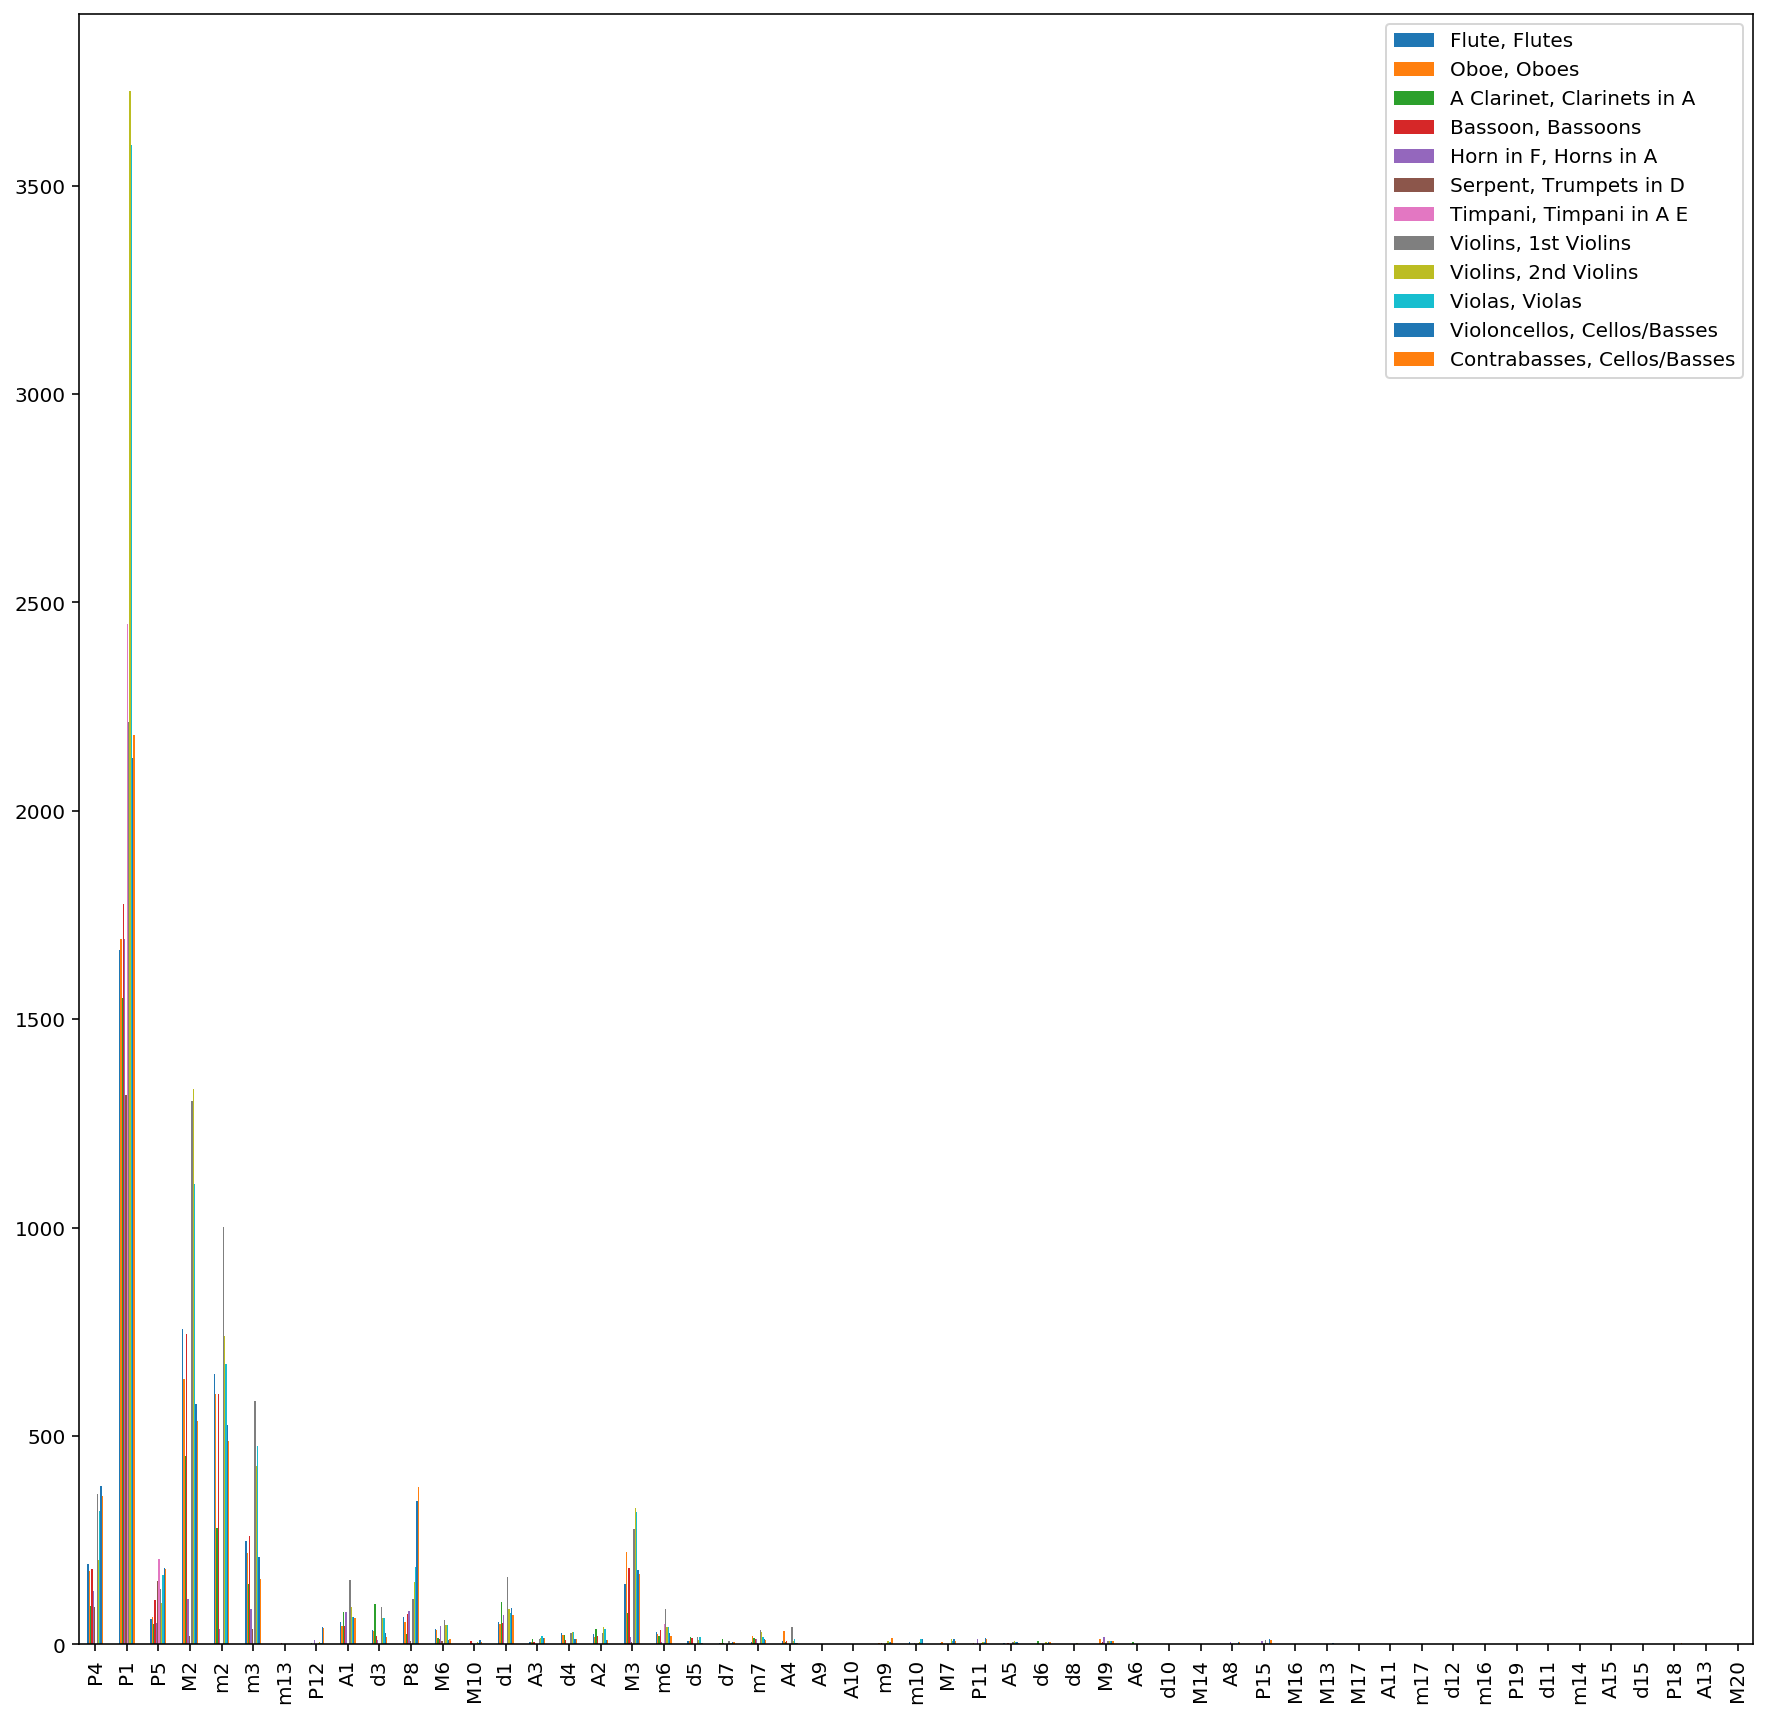

In [132]:
df.plot(figsize = (15, 15), kind = 'bar')

In [133]:
M2_df = df.loc['M2',:]
M2_df

Flute, Flutes                   757.0
Oboe, Oboes                     636.0
A Clarinet, Clarinets in A      452.0
Bassoon, Bassoons               746.0
Horn in F, Horns in A           110.0
Serpent, Trumpets in D           21.0
Timpani, Timpani in A E           NaN
Violins, 1st Violins           1304.0
Violins, 2nd Violins           1333.0
Violas, Violas                 1104.0
Violoncellos, Cellos/Basses     578.0
Contrabasses, Cellos/Basses     537.0
Name: M2, dtype: float64

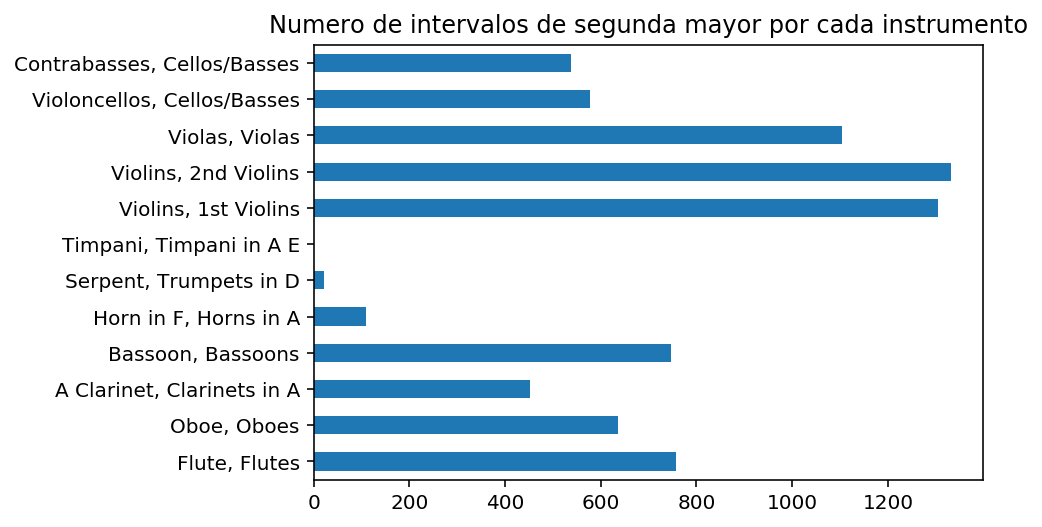

In [134]:
M2_df.plot(kind = 'barh', title = 'Numero de intervalos de segunda mayor por cada instrumento')

Documentación de plot: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html